**German Powergrid**

bharambe.vinay3011@gmail.com

roshnijharbade890@gmail.com

anil.kandel3227@gmail.com

dhillonaman777777@gmail.com

In [1]:
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as go

In [2]:
# flushing the arrays and importing fresh unhandled data again
v=[]
x=[]
y=[]
type=[]
p=[]
q=[]
cables=[]
wires=[]
pos=[]
color=[]

v,x,y,type = np.loadtxt('nodes.txt', unpack=True)
p,q,cables,wires = np.loadtxt('weight.txt', unpack=True)
 

In [3]:
#importing clean data

v,x,y,type = np.loadtxt('nodes.txt', unpack=True)
p,q,cables,wires = np.loadtxt('weight.txt', unpack=True)
                
#types numbering
#substation=1, plant=2, generator=3, auxillary_t_node=4

In [4]:
# Index of Power generating nodes

power=[]
for i in range(0,len(x)):
    if(type[i]==2 or type[i]==3):
        power.append(int(v[i]))
        
print(power)

[50, 54, 82, 84, 91, 115, 121, 138, 142, 143, 166, 188, 202, 205, 206, 210, 217, 248, 249, 250, 251, 252, 257, 291, 293, 296, 310, 365, 368, 410, 423, 497, 507]


In [5]:
#Please enter node numbers

# Enter "x" to exit the loop
power_plant=[]

for i in range(0,len(power)):
    k=input("Enter number : ")
    
    if(k=='x' or k=='X'):
        break
    else:
        power_plant.append(int(k))

Enter number : 50
Enter number : 54
Enter number : x


In [6]:
power_plant

[138,
 142,
 143,
 166,
 188,
 202,
 205,
 206,
 210,
 217,
 248,
 249,
 250,
 251,
 252,
 257,
 291,
 293,
 296,
 310,
 365,
 368,
 410,
 423,
 497,
 507]

In [7]:
#power_plant=[49, 53, 81, 83, 90, 114, 120]
 
#Identifying the affected links and nodes
    
a = []
a1=[]
final=[]
for i in range(0,len(p)):
    for j in power_plant:
        if(p[i]==j):
            a.append(q[i])
        elif q[i]==j:
            a.append(p[i])


for i1 in range(0,len(p)):
    for k in a:
        if(p[i]==k):
            a1.append(q[i])
        elif(q[i]==k):
            a1.append(p[i])

In [8]:
penultimate = list(set(power_plant) | set(a))

attack_nodes = list(set(penultimate) | set(a1))

In [9]:
a1=[]
for i in range(0,len(p)):
    for j in attack_nodes:
        if p[i] == j:
            a1.append(i)
        elif q[i] == j:
            a1.append(i)
a=[*set(a1)]

In [10]:
#Deleting affected nodes
for i in a:
    p=np.delete(p,i-a.index(i))
    q=np.delete(q,i-a.index(i))
    cables=np.delete(cables,i-a.index(i))
    wires=np.delete(wires,i-a.index(i))

In [11]:
#adding nodes
G=nx.Graph()
count=0        
for i in range(0,len(v),1):
    G.add_node(v[i],pos=(x[i],y[i]))

pos=nx.get_node_attributes(G,'pos')


In [12]:
#adding links with weights (weight assumptions, cables=1 ,wires=0.2)
weight_edge = []
count = 0
for i in range(0,len(cables),1):

    weight_edge.append(math.ceil(1+cables[i]+(0.2*wires[i])))
    G.add_edge(p[i],q[i],weight=weight_edge[i])



In [13]:
degs=[]
nodesize=[]
for i,deg in nx.degree(G):
    degs.append(deg)
    nodesize.append(150*deg)
    
#color coding using station type as reference
#substation ==> blue
#plant ==> yellow
#generator ==> green
#auillarynode ==> orange
color=["#0f03fc"]*len(v)
for i in range(0,len(v),1):        
    if (type[i]==1):
        color[i]="#0f03fc"
    elif(type[i]==2):
        color[i]="#fcfc03"
    elif(type[i]==3):
        color[i]="#3aeb34"
    else:
        color[i]="#fc7b03"

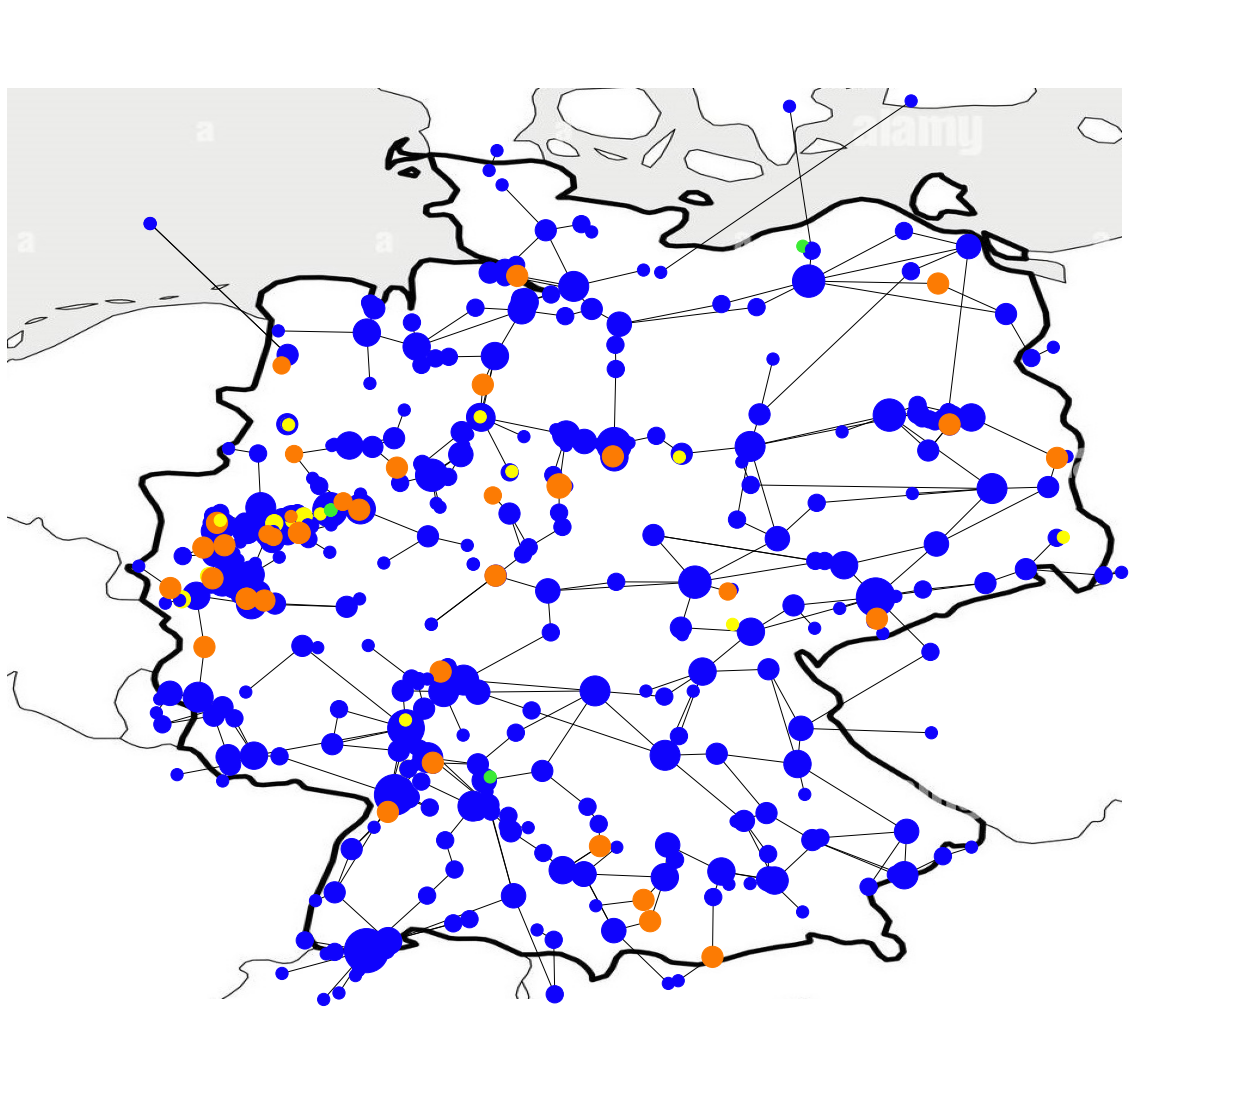

In [14]:
plt.rcParams["figure.figsize"] = (70,20)
img = plt.imread("1.jpg")
fig, ax = plt.subplots()
ax.imshow(img, extent=[4.687555, 15.11496564,47.09422083,55.610345])


nx.draw(G,pos,node_color=color,node_size=nodesize,with_labels=False)

In [15]:
print("Number of Edges:"+str(int(len(G.edges()))))
print("Number of Nodes attacked:"+str(int(len(power_plant)))+" out of 511")
print("\nPercentage Damage:"+str(100-(len(G.edges)*100/679)))

Number of Edges:553
Number of Nodes attacked:26 out of 511

Percentage Damage:18.55670103092784
